# Q.1.) A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

In [32]:
#Load the dataset
cutlets=pd.read_csv(r'C:\Users\suraj\Assignments\Hypothesis Testing/Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [33]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [34]:
#Checking for null values
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [35]:
#checking for duplicate values
cutlets[cutlets.duplicated()].shape

(0, 2)

In [36]:
cutlets[cutlets.duplicated()]


,Unit A,Unit B


In [37]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [38]:
unitA=pd.Series(cutlets.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [39]:
unitB=pd.Series(cutlets.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [41]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)
statistic,p_value=stats.ttest_ind(unitA,unitB)
print('p_value=',p_value)

p_value= 0.4722394724599501


In [42]:
alpha = 0.025
print('Significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significance=0.025, p=0.472
We fail to reject Null hypothesis


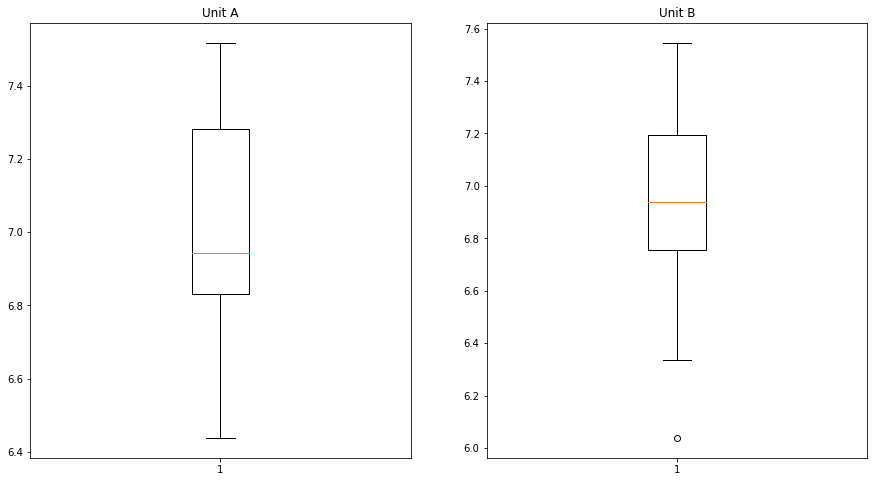

In [46]:
#plot the data
plt.subplots(figsize = (15,8))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

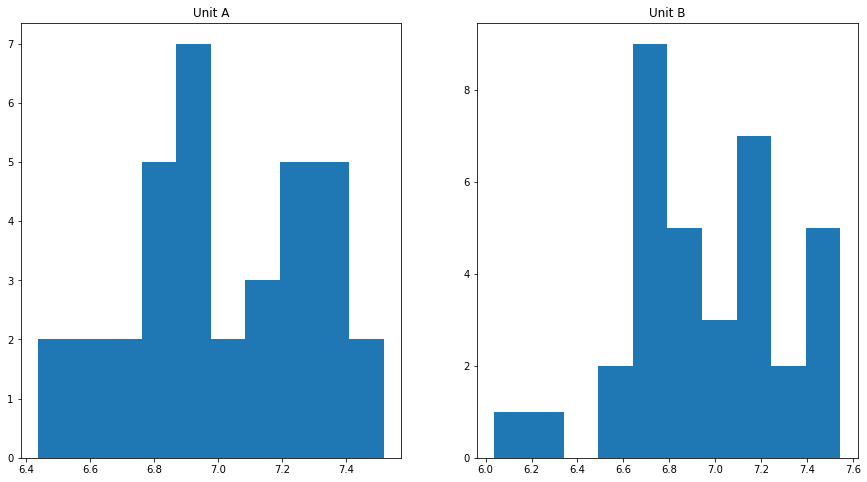

In [47]:
plt.subplots(figsize = (15,8))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 10)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 10)
plt.title('Unit B')
plt.show()

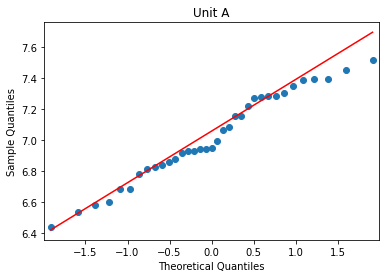

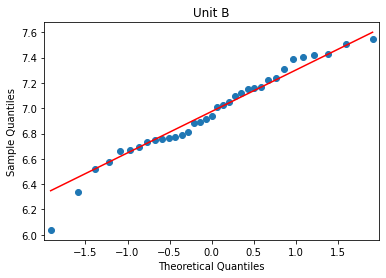

In [48]:
#checking whether the distribution follows normal distribution or not
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

# Q.2.) A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [49]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [50]:
# load the dataset
LabTAT=pd.read_csv(r'C:\Users\suraj\Assignments\Hypothesis Testing/LabTAT.csv')
LabTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [51]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [52]:
#Checking for Null values
LabTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [53]:
LabTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [54]:
# Anova ftest statistics: stats.f_oneway(column-1,column-2,column-3,column-4)
statistic,p_value=stats.f_oneway(LabTAT.iloc[:,0],LabTAT.iloc[:,1],LabTAT.iloc[:,2],LabTAT.iloc[:,3])
print('p_value=',p_value)

p_value= 2.1156708949992414e-57


In [55]:
 # compare it with α = 0.05

In [56]:
alpha = 0.05
print('Significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significance=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Q.3.)       Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [20]:
# load the dataset
BuyerRatio=pd.read_csv(r'C:\Users\suraj\Assignments\Hypothesis Testing/BuyerRatio.csv')
BuyerRatio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [21]:
BuyerRatio_table=BuyerRatio.iloc[:,1:6]
BuyerRatio_table


,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [22]:
# Make dimensional array
obs=np.array([[50,142,131,70],[435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [11]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [25]:

observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])


In [26]:

statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [12]:
# Compare p_value with α = 0.05

In [28]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significant association or dependency between the gender based buyer rations across regions')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


###  As (p-value = 0.6603) > (α = 0.05); Accept the Null Hypothesis i.e. Independence of categorical variables Thus, male-female buyer rations are similar across regions and are not related

# 

# 

# Q.4.)      TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [66]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [67]:
#load the dataset
Costomer_OrderForm=pd.read_csv(r'C:\Users\suraj\Assignments\Hypothesis Testing/Costomer+OrderForm.csv')
Costomer_OrderForm

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [68]:
Costomer_OrderForm.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [69]:
Costomer_OrderForm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [70]:
Costomer_OrderForm.Phillippines.value_counts()


Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [71]:
Costomer_OrderForm.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [72]:
Costomer_OrderForm.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [73]:
Costomer_OrderForm.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [74]:
# Making a contingency table
obs=np.array([[271,267,269,280],[29,33,31,20]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [31]:
stat, p, df, exp = stats.chi2_contingency(obs)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  1.595945538661058 
 P_Value =  0.6603094907091882 
 degree of freedom = 3 
 Expected Values =  [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [32]:
# Chi2 contengency independence test
chi2_contingency(obs) # o/p is (Chi2 stats value, p_value, df, expected obsvations)


(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [33]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [34]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [76]:
# Compare p_value with α = 0.05

In [36]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis customer order forms defective % varies by centre.')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


### As (p_value = 0.2771) > (α = 0.05); Accept Null Hypthesis i.e. Independence of categorical variables Thus, customer order forms defective % does not varies by centre.